# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno

from datetime import datetime

# Styles and Settings

In [2]:
%matplotlib inline
sns.set_style("dark")
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

# Data Gathering

data gathered from https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

In [3]:
# Reading the csv file
data_raw = pd.read_csv('../data/raw/owid-covid-data.csv')

In [4]:
data_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
data_raw.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
# Required data
data_trivial = data_raw[['date', 'location','total_cases', 'population', 'people_fully_vaccinated']]

In [7]:
data_trivial.tail()

,date,location,total_cases,population,people_fully_vaccinated
196769,2022-06-21,Zimbabwe,254919.0,15092171.0,4583367.0
196770,2022-06-22,Zimbabwe,255049.0,15092171.0,4588340.0
196771,2022-06-23,Zimbabwe,255136.0,15092171.0,4613420.0
196772,2022-06-24,Zimbabwe,255309.0,15092171.0,NaN
196773,2022-06-25,Zimbabwe,255309.0,15092171.0,NaN


In [8]:
# Changing the column names
data_trivial = data_trivial.rename(columns={'location':'country', 'total_cases':'infected', 'people_fully_vaccinated':'vaccinated'})

In [9]:
data_trivial.head()

,date,country,infected,population,vaccinated
0,2020-02-24,Afghanistan,5.0,39835428.0,NaN
1,2020-02-25,Afghanistan,5.0,39835428.0,NaN
2,2020-02-26,Afghanistan,5.0,39835428.0,NaN
3,2020-02-27,Afghanistan,5.0,39835428.0,NaN
4,2020-02-28,Afghanistan,5.0,39835428.0,NaN


In [10]:
# Adding 'Relativecases' and 'vaccination_rate' columns
data_trivial['Relativecases'] = data_trivial['infected']/data_trivial['population']
data_trivial['vaccination_rate'] = (data_trivial['vaccinated']/data_trivial['population'])*100

In [11]:
data_trivial.tail()

,date,country,infected,population,vaccinated,Relativecases,vaccination_rate
196769,2022-06-21,Zimbabwe,254919.0,15092171.0,4583367.0,0.016891,30.369170
196770,2022-06-22,Zimbabwe,255049.0,15092171.0,4588340.0,0.016899,30.402120
196771,2022-06-23,Zimbabwe,255136.0,15092171.0,4613420.0,0.016905,30.568299
196772,2022-06-24,Zimbabwe,255309.0,15092171.0,NaN,0.016917,NaN
196773,2022-06-25,Zimbabwe,255309.0,15092171.0,NaN,0.016917,NaN


# Converting date to correct data-type

In [12]:
date = data_trivial['date'][0]
type(date)

str

In [13]:
date_idx = [datetime.strptime(each, '%Y-%m-%d') for each in data_trivial.date]

In [14]:
data_trivial['date'] = date_idx

In [15]:
data_trivial.head()

,date,country,infected,population,vaccinated,Relativecases,vaccination_rate
0,2020-02-24,Afghanistan,5.0,39835428.0,NaN,1.255164e-07,NaN
1,2020-02-25,Afghanistan,5.0,39835428.0,NaN,1.255164e-07,NaN
2,2020-02-26,Afghanistan,5.0,39835428.0,NaN,1.255164e-07,NaN
3,2020-02-27,Afghanistan,5.0,39835428.0,NaN,1.255164e-07,NaN
4,2020-02-28,Afghanistan,5.0,39835428.0,NaN,1.255164e-07,NaN


In [16]:
data_trivial.dtypes

date                datetime64[ns]
country                     object
infected                   float64
population                 float64
vaccinated                 float64
Relativecases              float64
vaccination_rate           float64
dtype: object

# Analysis of one country

In [17]:
data_trivial['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [18]:
data_ind = data_trivial[data_trivial['country'] == 'India']
data_ind.tail()

,date,country,infected,population,vaccinated,Relativecases,vaccination_rate
82124,2022-06-21,India,43331645.0,1.393409e+09,906949409.0,0.031098,65.088527
82125,2022-06-22,India,43344958.0,1.393409e+09,907810836.0,0.031107,65.150348
82126,2022-06-23,India,43362294.0,1.393409e+09,908786223.0,0.031120,65.220348
82127,2022-06-24,India,43378234.0,1.393409e+09,909724866.0,0.031131,65.287711
82128,2022-06-25,India,43389973.0,1.393409e+09,910723911.0,0.031139,65.359409


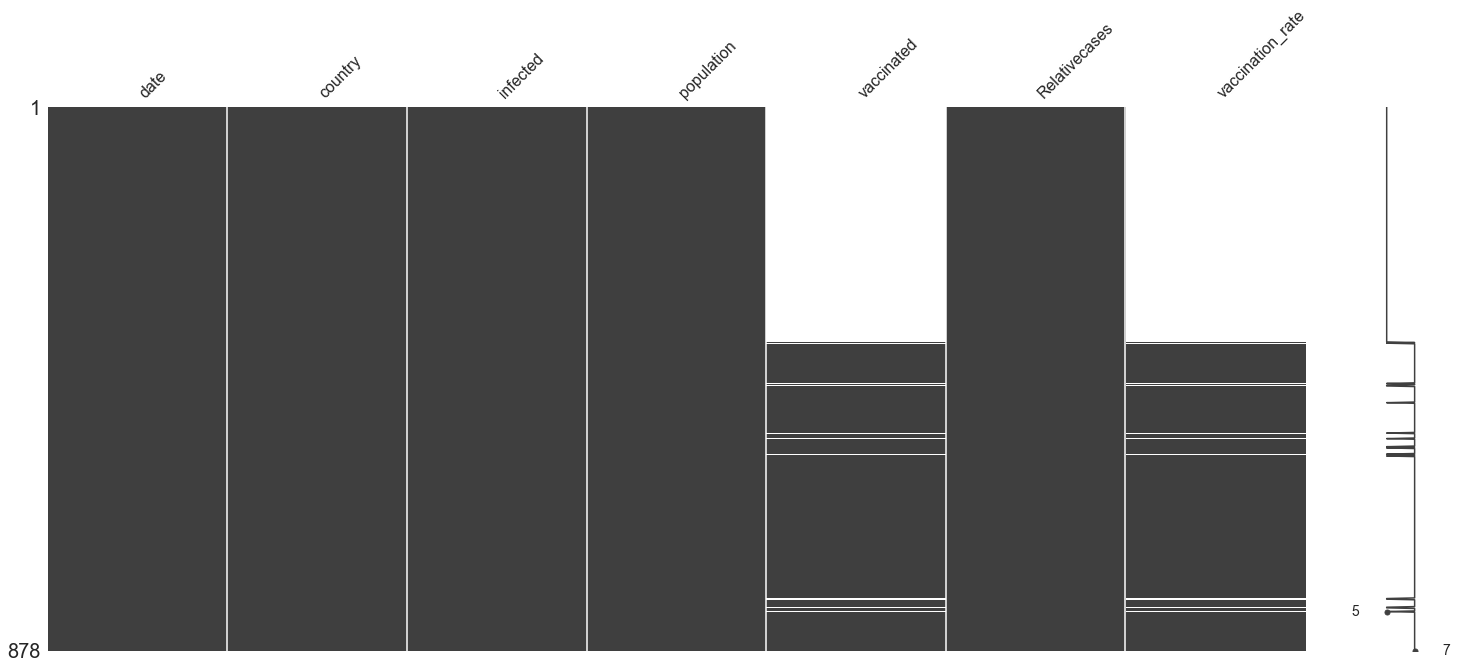

In [19]:
# Checking the completion of data
msno.matrix(data_ind)

As per the above image its is evident that, some of the data in vaccinated column is missing. If we want to fill this data, then we have to interpolate the data.

### Ploting infected data

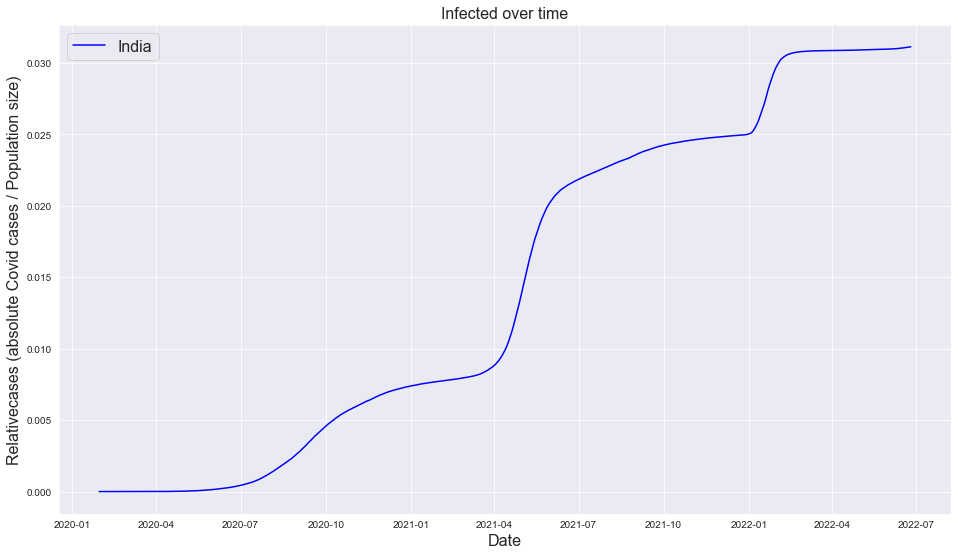

In [20]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(data_ind['date'], (data_ind['infected']/data_ind['population']), label='India', color = 'b')

ax1.set_yscale('linear')

ax1.set_title('Infected over time', size = 16)
ax1.set_xlabel('Date', size = 16)
ax1.set_ylabel('Relativecases (absolute Covid cases / Population size)', size = 16)

ax1.legend(loc='best', prop={'size':16})

plt.grid()

### Ploting infected data

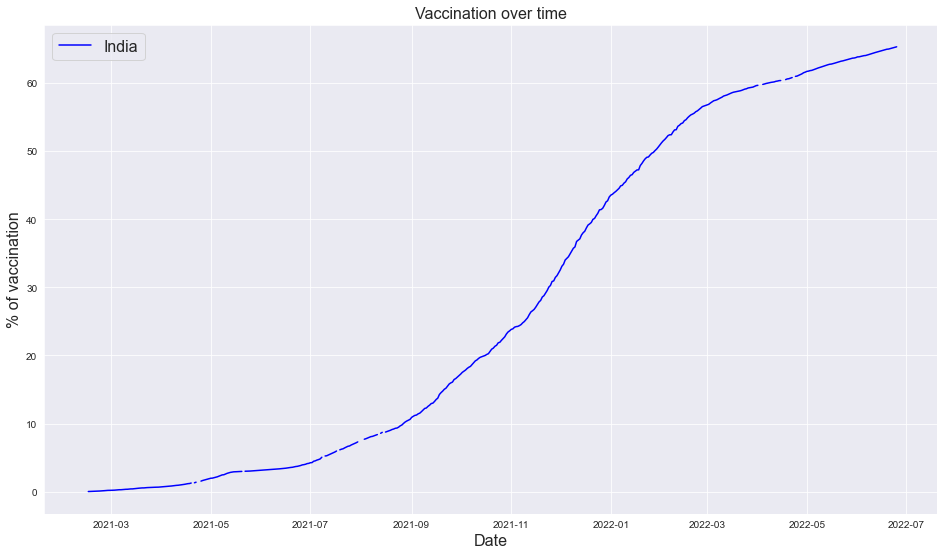

In [21]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(data_ind['date'], (data_ind['vaccinated']/data_ind['population'])*100, label='India', color = 'b')

ax1.set_yscale('linear')

ax1.set_title('Vaccination over time', size = 16)
ax1.set_xlabel('Date', size = 16)
ax1.set_ylabel('% of vaccination', size = 16)

ax1.legend(loc='best', prop={'size':16})

plt.grid()

# Analysis of multiple countries

In [22]:
# Creating the dataframe with date as index
total_dates = pd.DataFrame(data_trivial['date'])

In [23]:
dates_unique = total_dates['date'].unique()

In [24]:
len(dates_unique)

907

In [25]:
df_dates = pd.DataFrame(dates_unique)

In [26]:
df_dates.rename(columns={0:'date'}, inplace=True)   # Renames the columns and save to df_dates

In [27]:
df_dates.sort_values(by='date', inplace=True)

In [28]:
data_analysis = df_dates.set_index(['date'])

In [29]:
country_list = ['India', 'Germany', 'Spain']

In [30]:
country_list = data_trivial['country'].unique()

In [31]:
data_processed = data_trivial.set_index(['date'])

In [32]:
for each in country_list:
    data_analysis[each+'_infected'] = pd.DataFrame(data_processed[data_processed['country'] == each]['infected'])
    data_analysis[each+'_Relativecases'] = pd.DataFrame(data_processed[data_processed['country'] == each]['Relativecases'])
    data_analysis[each+'_vaccinationRate'] = pd.DataFrame(data_processed[data_processed['country'] == each]['vaccination_rate'])

In [33]:
data_analysis.tail()

,Afghanistan_infected,Afghanistan_Relativecases,Afghanistan_vaccinationRate,Africa_infected,Africa_Relativecases,Africa_vaccinationRate,Albania_infected,Albania_Relativecases,Albania_vaccinationRate,Algeria_infected,...,World_vaccinationRate,Yemen_infected,Yemen_Relativecases,Yemen_vaccinationRate,Zambia_infected,Zambia_Relativecases,Zambia_vaccinationRate,Zimbabwe_infected,Zimbabwe_Relativecases,Zimbabwe_vaccinationRate
date,,,,,,,,,,,,,,,,,,,,,
2022-06-21,181808.0,0.004564,12.501259,11994315.0,0.008733,18.373953,277663.0,0.096648,NaN,265993.0,...,60.700352,11824.0,0.000388,NaN,324558.0,0.017154,NaN,254919.0,0.016891,30.369170
2022-06-22,181912.0,0.004567,NaN,12002174.0,0.008738,18.382256,277940.0,0.096744,NaN,266006.0,...,60.721775,11824.0,0.000388,NaN,324558.0,0.017154,22.518129,255049.0,0.016899,30.402120
2022-06-23,181987.0,0.004568,NaN,12011490.0,0.008745,18.390079,278211.0,0.096839,NaN,266015.0,...,60.750128,11824.0,0.000388,NaN,324922.0,0.017173,22.881986,255136.0,0.016905,30.568299
2022-06-24,182033.0,0.004570,NaN,12017973.0,0.008750,18.390883,278504.0,0.096941,NaN,266025.0,...,60.777040,11824.0,0.000388,NaN,325110.0,0.017183,NaN,255309.0,0.016917,NaN
2022-06-25,182072.0,0.004571,NaN,12023592.0,0.008754,18.391527,278793.0,0.097041,NaN,266030.0,...,60.792700,11824.0,0.000388,NaN,325110.0,0.017183,NaN,255309.0,0.016917,NaN


### Ploting infected data

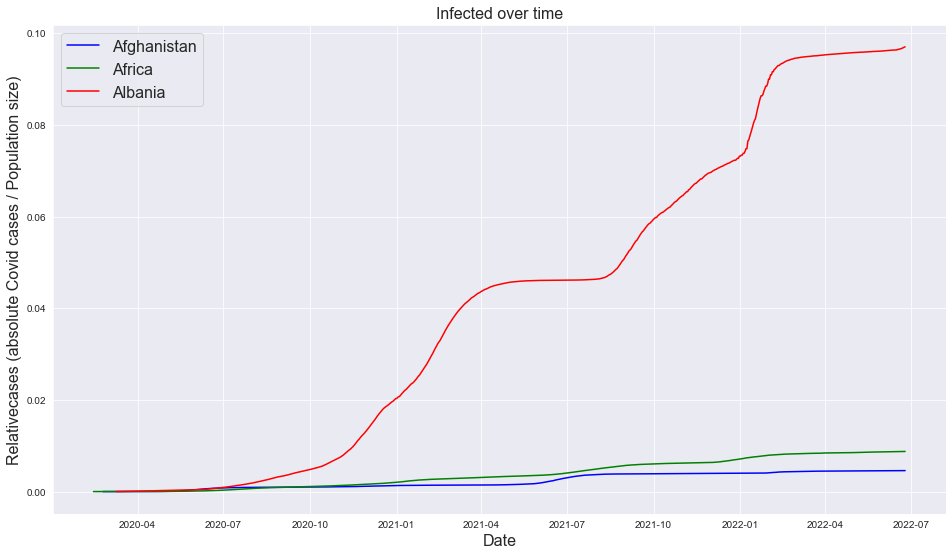

In [34]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(data_analysis.index, data_analysis[country_list[0]+'_Relativecases'], label=country_list[0], color = 'b')
ax1.plot(data_analysis.index, data_analysis[country_list[1]+'_Relativecases'], label=country_list[1], color = 'g')
ax1.plot(data_analysis.index, data_analysis[country_list[2]+'_Relativecases'], label=country_list[2], color = 'r')

ax1.set_yscale('linear')

ax1.set_title('Infected over time', size = 16)
ax1.set_xlabel('Date', size = 16)
ax1.set_ylabel('Relativecases (absolute Covid cases / Population size)', size = 16)

ax1.legend(loc='best', prop={'size':16})
plt.grid()

### Ploting % of vaccinated population overtime

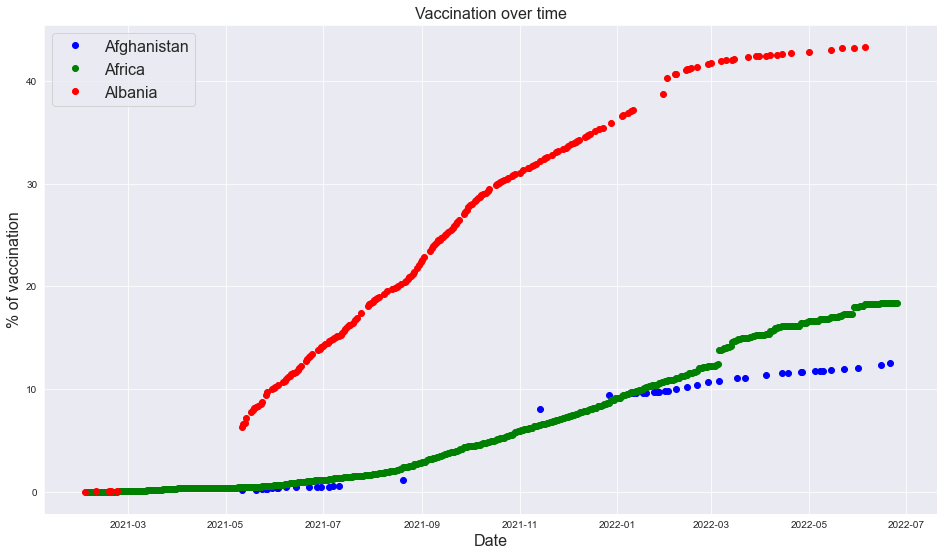

In [35]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(data_analysis.index, data_analysis[country_list[0]+'_vaccinationRate'],'o', label=country_list[0], color = 'b')
ax1.plot(data_analysis.index, data_analysis[country_list[1]+'_vaccinationRate'],'o', label=country_list[1], color = 'g')
ax1.plot(data_analysis.index, data_analysis[country_list[2]+'_vaccinationRate'],'o', label=country_list[2], color = 'r')

ax1.set_yscale('linear')

ax1.set_title('Vaccination over time', size = 16)
ax1.set_xlabel('Date', size = 16)
ax1.set_ylabel('% of vaccination', size = 16)

ax1.legend(loc='best', prop={'size':16})
plt.grid()

# Output from this notebook for the Dashboard

In [36]:
data_analysis.to_csv('../data/processed/processed_data.csv')